# IMPORTS 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 

import warnings
warnings.filterwarnings('ignore')

# EDA 

## Quick Data Look 

In [2]:
data = pd.read_csv("../input/csc578-spring-2022-final/Metro_Interstate_reduced.csv", parse_dates= ["date_time"])
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Column Descriptions 



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp                 40575 non-null  float64       
 2   rain_1h              40575 non-null  float64       
 3   snow_1h              40575 non-null  float64       
 4   clouds_all           40575 non-null  int64         
 5   weather_main         40575 non-null  object        
 6   weather_description  40575 non-null  object        
 7   date_time            40575 non-null  datetime64[ns]
 8   traffic_volume       40575 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.8+ MB


Findings: 
* `holiday`, `weather_description` and `weather_main` are categorical features.
* `temp`, `rain_1h` , `snow_1h` , `clouds_all`  and `traffic_volume` are continuous features.
* `date_time` is a datetime feature.

## Continuous features

#### Basic Statistics 

In [4]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474
std,13.816618,48.812640,0.005676,38.683447,1984.772909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


#### Feature Distribution

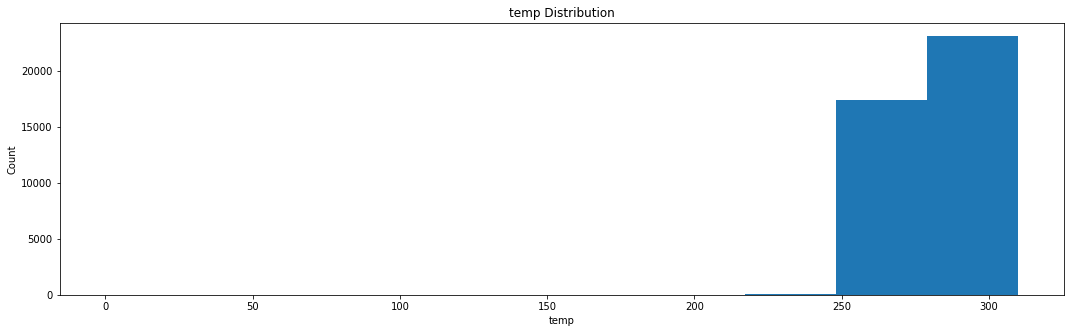

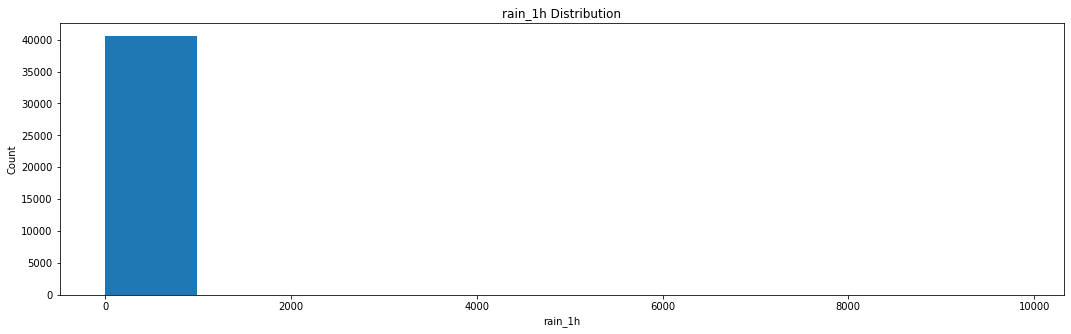

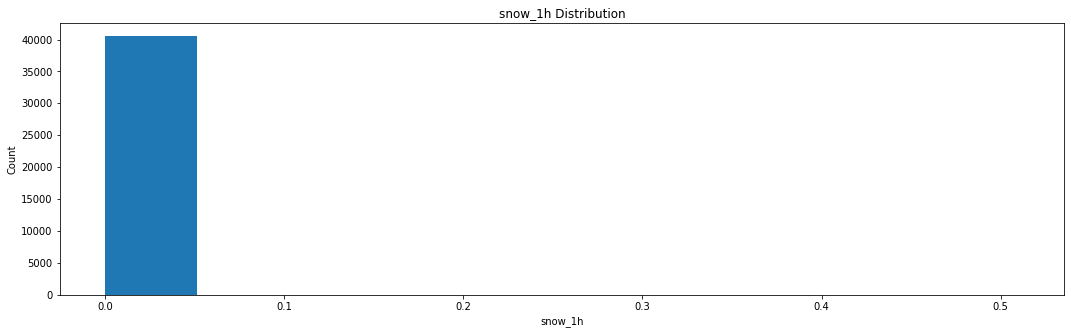

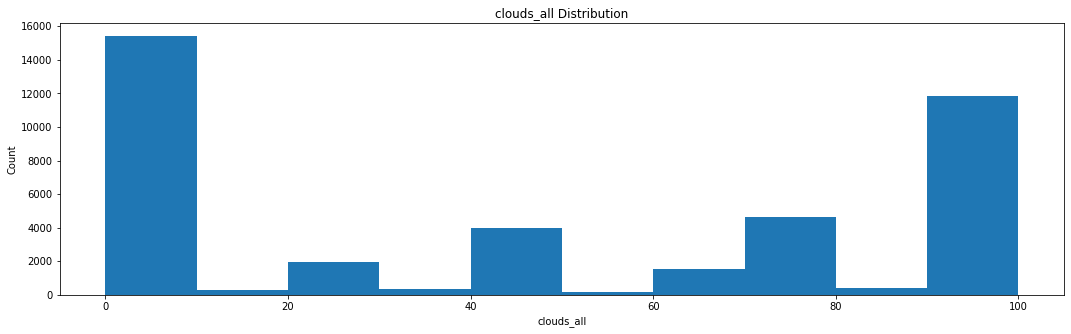

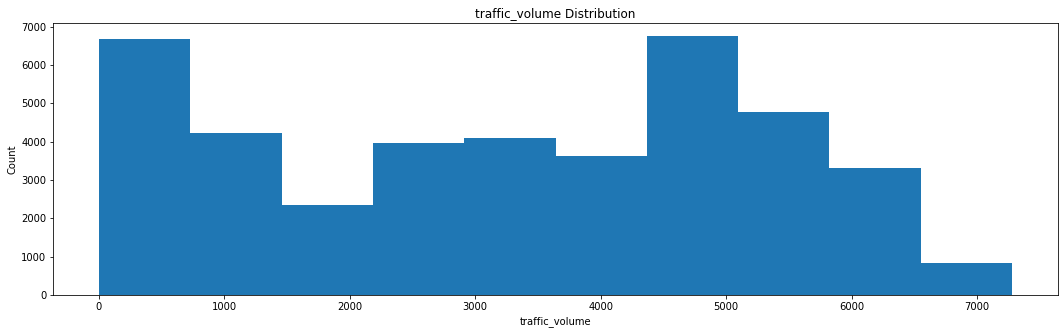

In [5]:
cont_feats = ["temp", "rain_1h","snow_1h","clouds_all","traffic_volume"]
for feats in cont_feats:
    fig,ax = plt.subplots(figsize = (18,5))
    plt.hist(data[feats])
    plt.ylabel("Count")
    plt.xlabel(feats)
    plt.title(label = feats + str(" Distribution"))
    plt.show()

Findings: 
* `rain_1h`, `temp` and `snow_1h` have outlier values.

## Evolution of feature over time 

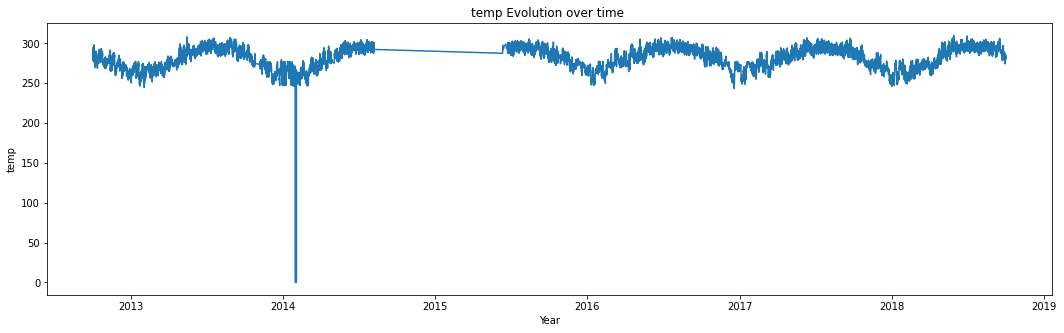

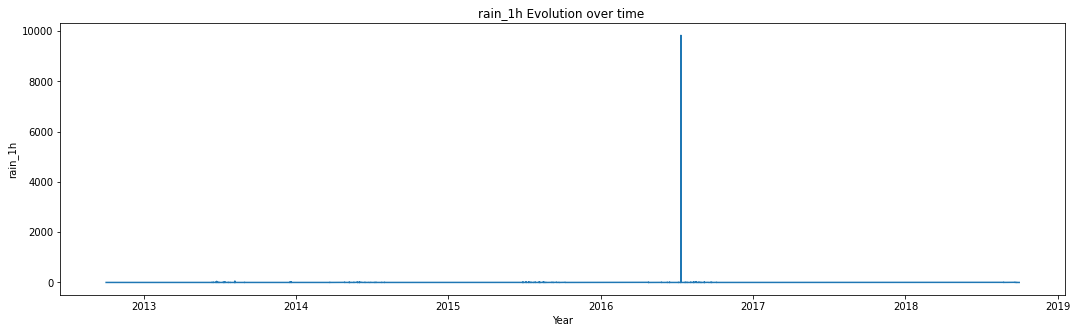

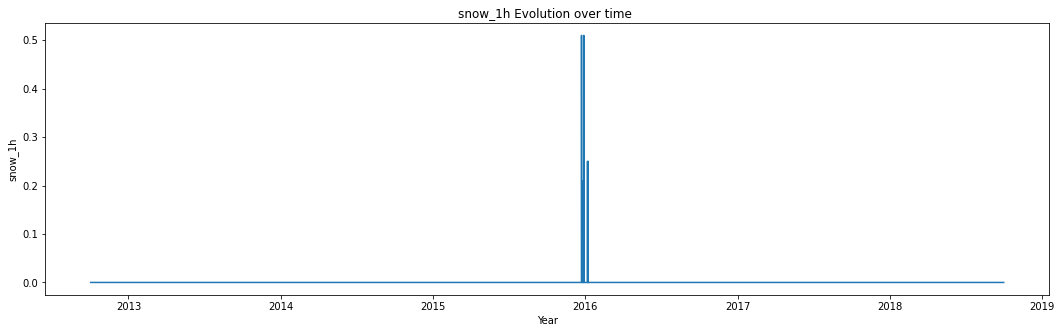

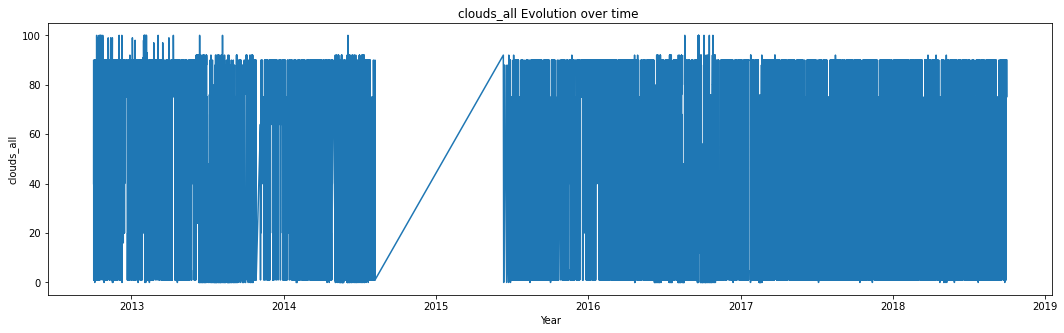

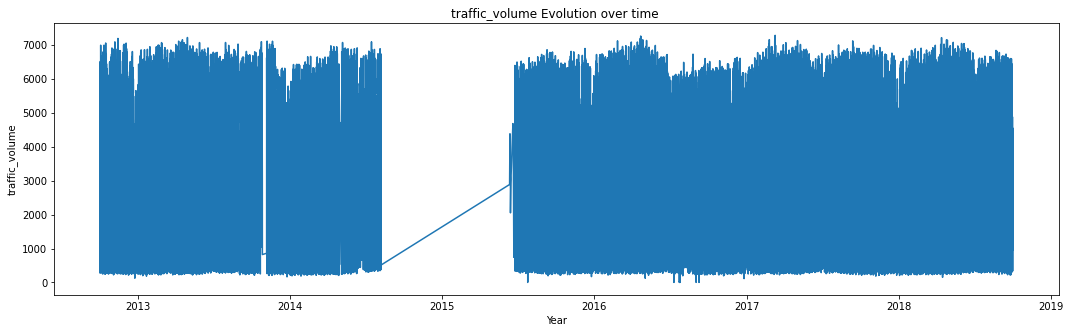

In [6]:
cont_feats = ["temp", "rain_1h","snow_1h","clouds_all","traffic_volume"]
for feats in cont_feats:
    fig,ax = plt.subplots(figsize = (18,5))
    plt.plot(data["date_time"], data[feats])
    plt.xlabel("Year")
    plt.ylabel(feats)
    plt.title(label = feats + str(" Evolution over time "))
    plt.show()

## Categorical features

#### Feature Distribution

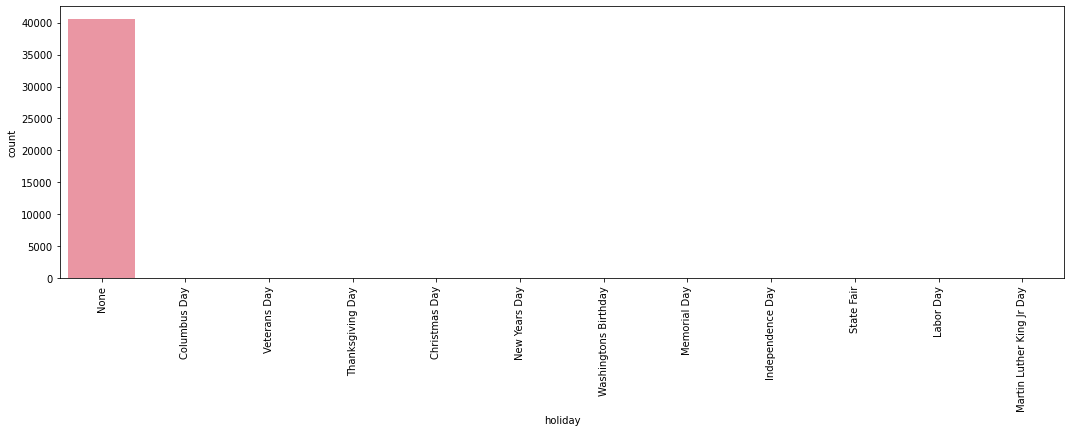

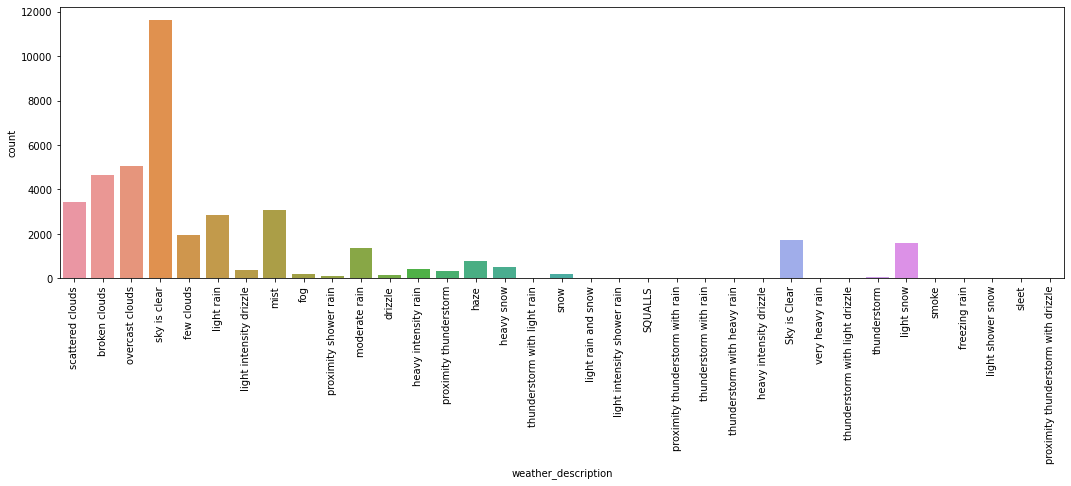

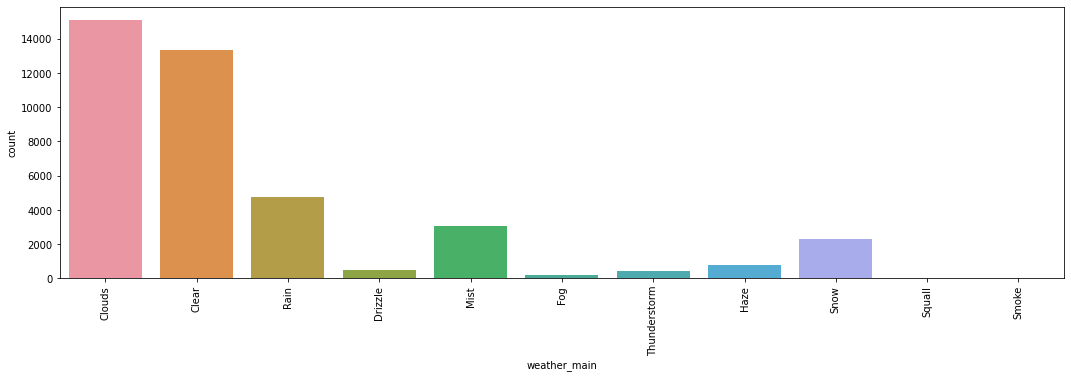

In [7]:
cat_feats = ["holiday", "weather_description", "weather_main"]

for feats in cat_feats:
    fig,ax = plt.subplots(figsize = (18,5))
    sns.countplot(data[feats])
    plt.xticks(rotation=90)
    plt.show();

Findings: 
* `holdiay` feature majorly consist of None value
* `weather_desciption` contains numerous unique categorical values distributed quite unequally. 

#### Holiday Feature Exploration 

In [8]:
data["holiday"].value_counts()

None                         40522
Columbus Day                     5
Veterans Day                     5
Thanksgiving Day                 5
Christmas Day                    5
New Years Day                    5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Labor Day                        5
Martin Luther King Jr Day        3
Name: holiday, dtype: int64

Findings: 
* `holdiay` feature contains few values of different holidays throughout the year.
* Replacing `holiday` feature with `is_holiday` will act as a important binary feature 

# Feature Engineering

## Temp Feature

In [9]:
## from the eda, it was quite evident temp feature had some outliers. Lets verify them 
print("Outlier Temperature = ", data["temp"].min())
print("Rows with oulier temperature : ", len(data[data["temp"] <= 200]))

Outlier Temperature =  0.0
Rows with oulier temperature :  10


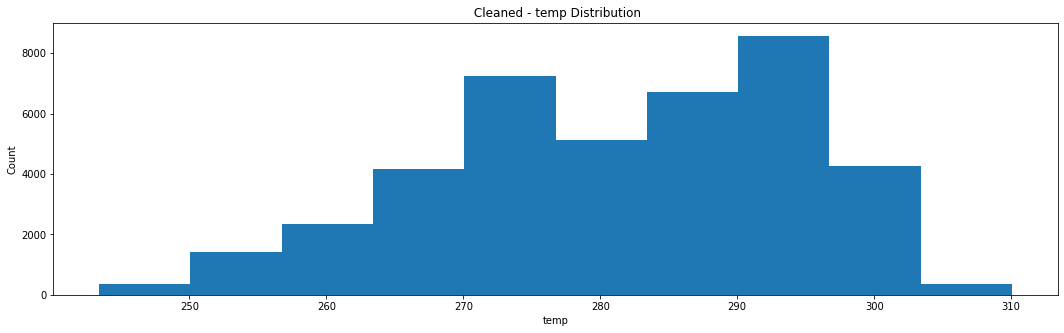

In [10]:
## The recoreded temperature is provided in Kelvin and 0' represent celcius. 
## Converting outliers to normal range 

data.loc[data["temp"] == 0, "temp" ] = 273

fig,ax = plt.subplots(figsize = (18,5))
plt.hist(data["temp"])
plt.ylabel("Count")
plt.xlabel("temp")
plt.title(label = " Cleaned - temp" + str(" Distribution"))
plt.show()

## Rain Feature 

In [11]:
## from the eda, it was quite evident rain_1h feature had some outliers. Lets verify them 
print("Outlier Rain Value = ", data["rain_1h"].max())
print("Rows with oulier Rain Value : ", len(data[data["rain_1h"] >= 5]))

Outlier Rain Value =  9831.3
Rows with oulier Rain Value :  138


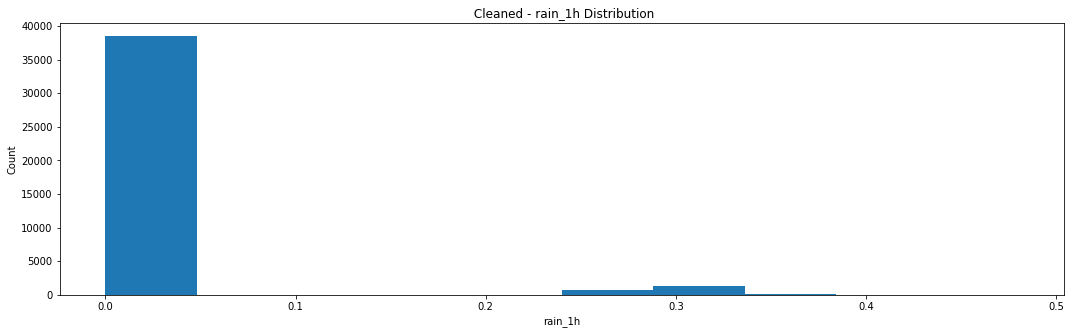

In [12]:
## Scaling the oulier row towards mean value
data.loc[data["rain_1h"] >= 0.5, "rain_1h" ] = data["rain_1h"].mean()

fig,ax = plt.subplots(figsize = (18,5))
plt.hist(data["rain_1h"])
plt.ylabel("Count")
plt.xlabel("rain_1h")
plt.title(label = " Cleaned - rain_1h" + str(" Distribution"))
plt.show()

## Snow Feature 

In [13]:
## from the eda, it was quite evident snow_1h feature had some outliers. Lets verify them 
print("Outlier Rain Value = ", data["snow_1h"].max())
print("Rows with oulier Rain Value : ", len(data[data["snow_1h"] >= 0.0001]))

Outlier Rain Value =  0.51
Rows with oulier Rain Value :  31


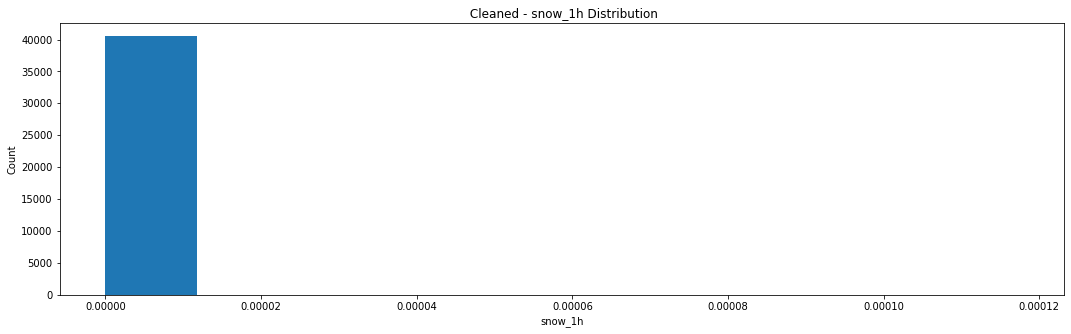

In [14]:
## Scaling the oulier row towards mean value
data.loc[data["snow_1h"] >=0.0001, "snow_1h" ] = data["snow_1h"].mean()

fig,ax = plt.subplots(figsize = (18,5))
plt.hist(data["snow_1h"])
plt.ylabel("Count")
plt.xlabel("snow_1h")
plt.title(label = " Cleaned - snow_1h" + str(" Distribution"))
plt.show()

Findings: 
* Both the `rain_1h` and `snow_1h` still contain few outliers, these outliers can play an important role in predicting the traffic for the next 2 hour window frame. In the feature enginnering, we scaled the values little closer to mean but preserving their outlier significance. 

## Holiday Feature 

In [15]:
print("Number of rows with holidays : ", len(data[data["holiday"] != "None"]))

## replacing all  holiday with 1 and None with 0 and converting holiday feature to a binary feature 

data["holiday"] = data["holiday"].apply( lambda x: 0 if x == "None" else 1 )

Number of rows with holidays :  53


Findings: 
* `Weather_main` and  `weather_description` consist of multiple imbalanced categories, hence dropping them would be the right choice for modelling. 

In [16]:
drop_columns = ["weather_main", "weather_description", "date_time"]

## dropping unwanted columns 
data = data.drop(drop_columns, axis = 1 )

# Spliting the data 

In [17]:
val_split = len(data) - 10000
test_split = len(data)- 5000


## Dropping last 10000 rows for validation and test split
train_data = data.iloc[:val_split]

## 5000 rows in validation set
val_data = data.iloc[val_split:test_split]

## 5000 last rows for test data 
test_data = data.iloc[test_split:]

print("Number of rows in train_data = ", len(train_data))
print("Number of rows in val_data = ", len(val_data))
print("Number of rows in test_data = ", len(test_data))

Number of rows in train_data =  30575
Number of rows in val_data =  5000
Number of rows in test_data =  5000


## Normalizing the data 

In [18]:
# From TF Tutorial
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
val_data = (val_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [19]:
## quick look at scaled data 
train_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,-0.036193,0.549920,-0.236838,-0.031857,-0.127503,1.144975
1,-0.036193,0.633094,-0.236838,-0.031857,0.779093,0.626369
2,-0.036193,0.650037,-0.236838,-0.031857,1.167634,0.752871
3,-0.036193,0.692393,-0.236838,-0.031857,1.167634,0.883404
4,-0.036193,0.770176,-0.236838,-0.031857,0.779093,0.828973


## Normalized Feature Visualization 

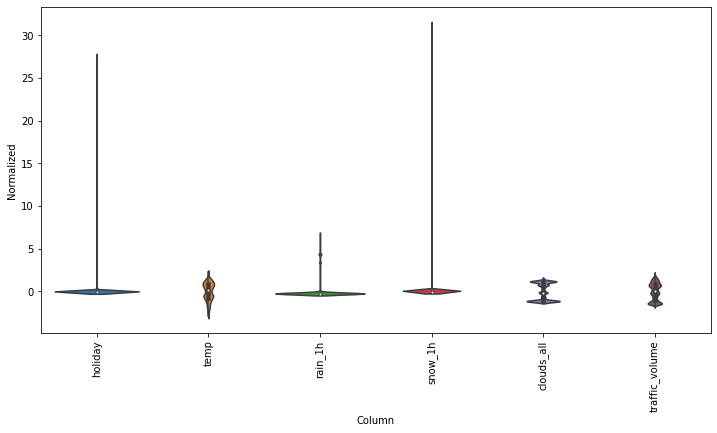

In [20]:
# From TF Tutorial
df_std = (data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)

## Windowing Datast 

In [21]:
# From TF Tutorial
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_data, val_df=val_data, test_df=test_data,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [22]:
## For this dataset, input window is of size 5 hours and prediction is to be done for 2 hour past the end of input window

input_window_width = 5
offset = 2
output_width = 1 

# From TF Tutorial
window_5_1_2 = WindowGenerator(input_width=input_window_width, 
                     label_width=output_width, 
                     shift=offset,
                     label_columns = ["traffic_volume"])
window_5_1_2

Total window size: 7
Input indices: [0 1 2 3 4]
Label indices: [6]
Label column name(s): ['traffic_volume']

## Window Split 

In [23]:
# From TF Tutorial
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

##  example of spltting windows on our dataset

example_window = tf.stack([np.array(train_data[:window_5_1_2.total_window_size]),
                           np.array(train_data[100:100+window_5_1_2.total_window_size]),
                           np.array(train_data[200:200+window_5_1_2.total_window_size])])

example_inputs, example_labels = window_5_1_2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 6)
Inputs shape: (3, 5, 6)
Labels shape: (3, 1, 1)


2022-06-09 00:22:25.136291: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Window Plot 

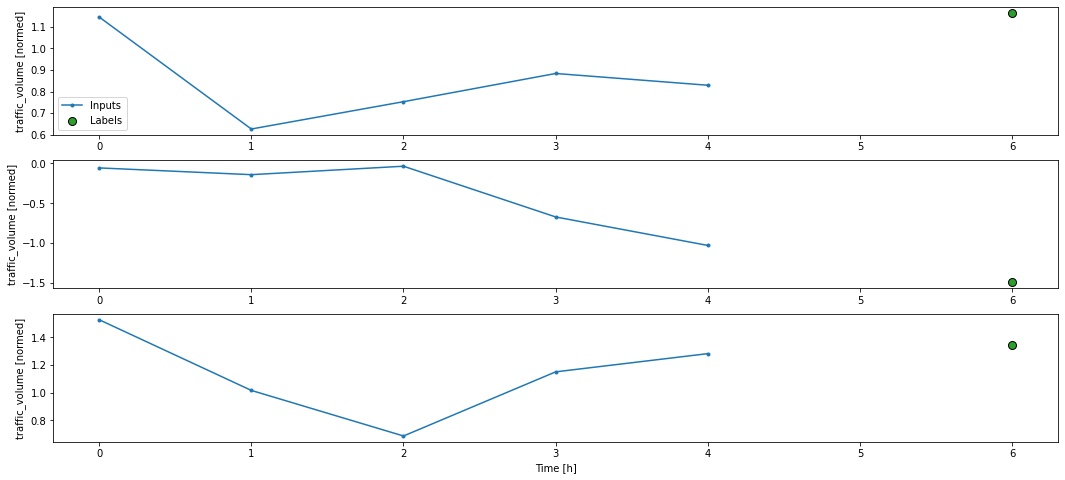

In [24]:
# From TF Tutorial
window_5_1_2.example = example_inputs, example_labels

def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(18, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            predictions = np.expand_dims(predictions , 1 )
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

window_5_1_2.plot(plot_col = "traffic_volume")

## Windows to tf.dataset 

In [25]:
# From TF Tutorial
def make_dataset(self, data, shuffle  = True):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=shuffle,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df,shuffle= False )

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
    # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
    # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

### Inspecing tf dataset 

In [26]:
train_batch = next(iter(window_5_1_2.train)) 
print("length of each batch = ",len(train_batch[0]))
print("Input tensors shape = ", train_batch[0].shape)
print("Output/Label tensors shape = ", train_batch[1].shape)

print("Sample Output tensor/labels : ",train_batch[1][:5] )

length of each batch =  32
Input tensors shape =  (32, 5, 6)
Output/Label tensors shape =  (32, 1, 1)
Sample Output tensor/labels :  tf.Tensor(
[[[ 1.4831524 ]]

 [[-0.25259006]]

 [[ 0.67928797]]

 [[-0.36699587]]

 [[ 1.0305692 ]]], shape=(5, 1, 1), dtype=float32)


2022-06-09 00:22:28.967769: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


# Baseline Model ( RNN MODEL ) 

In [27]:
## code for common training function for different models 
# From TF Tutorial

def compile_and_fit(model, window, NUM_EPOCHS, LR ):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2 ,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(LR),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=NUM_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping], 
                        verbose = 0) ## set verbosity to zero
    return history

157/157 [==============================] - 0s 2ms/step - loss: 0.1376 - mean_absolute_error: 0.2638


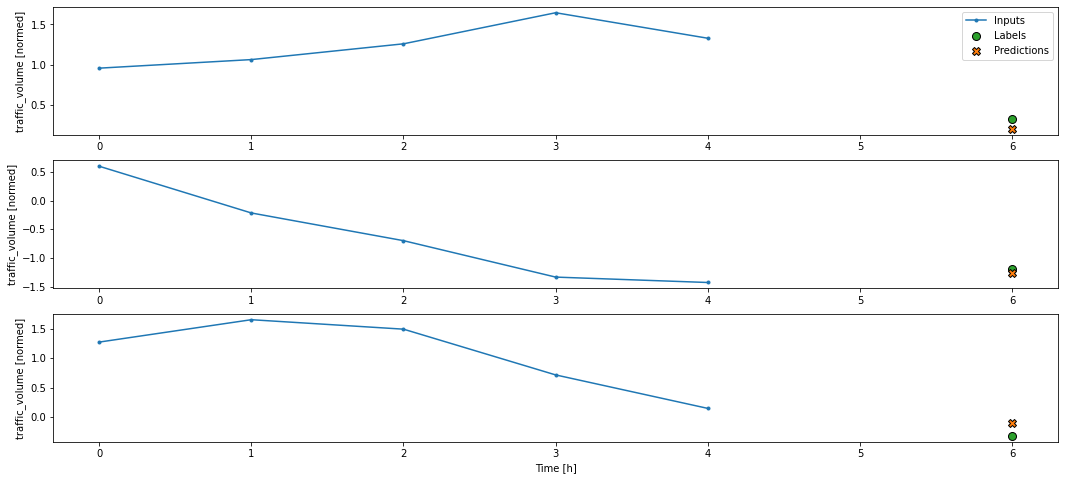

In [28]:
## we will create a simple single rnn layer model as our baseline model 
val_performance = {}
performance = {}

baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    tf.keras.layers.Dense(1)
])
NUM_EPOCHS = 20
LR = 0.01


history = compile_and_fit(baseline_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['Baseline'] = baseline_model.evaluate(window_5_1_2.val)
performance['Baseline'] = baseline_model.evaluate(window_5_1_2.test, verbose=0)

window_5_1_2.plot(baseline_model)

# Bidirectional RNN Model 

157/157 [==============================] - 1s 3ms/step - loss: 0.1004 - mean_absolute_error: 0.2251


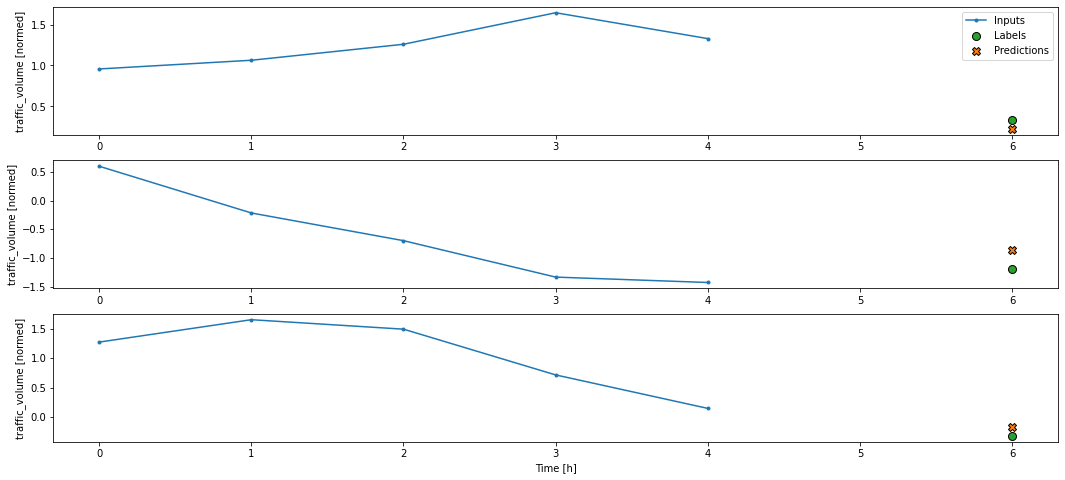

In [29]:
birnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32, return_sequences=False)),
    tf.keras.layers.Dense(1)
])

NUM_EPOCHS = 20
LR = 0.01

history = compile_and_fit(birnn_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['BI-RNN'] = birnn_model.evaluate(window_5_1_2.val)
performance['BI-RNN'] = birnn_model.evaluate(window_5_1_2.test, verbose=0)

window_5_1_2.plot(birnn_model)

# LSTM MODEL 

157/157 [==============================] - 1s 6ms/step - loss: 0.0876 - mean_absolute_error: 0.2126


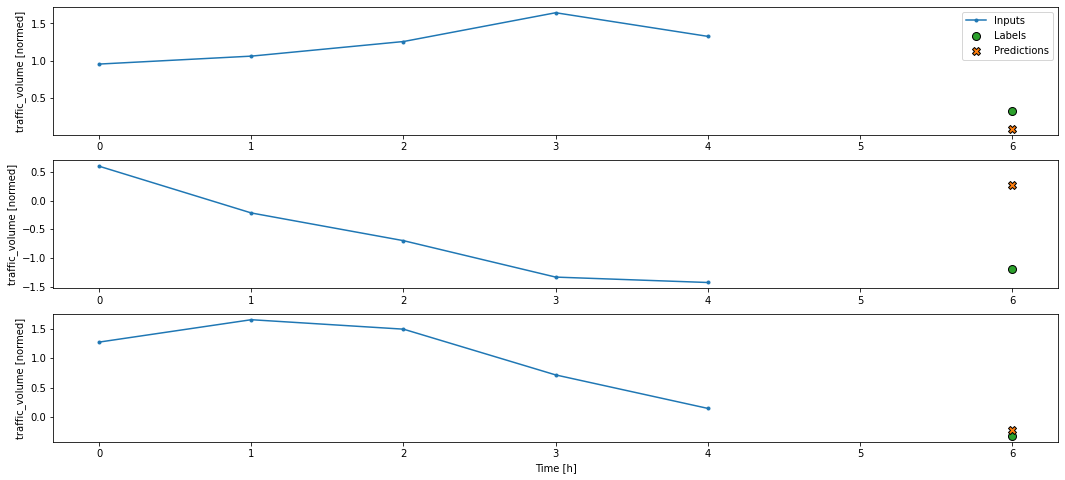

In [30]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(1)
])


NUM_EPOCHS = 20
LR = 0.01

history = compile_and_fit(lstm_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['LSTM'] = lstm_model.evaluate(window_5_1_2.val)
performance['LSTM'] = lstm_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(lstm_model)

# STACKED LSTM MODEL 

157/157 [==============================] - 1s 5ms/step - loss: 0.0736 - mean_absolute_error: 0.1878


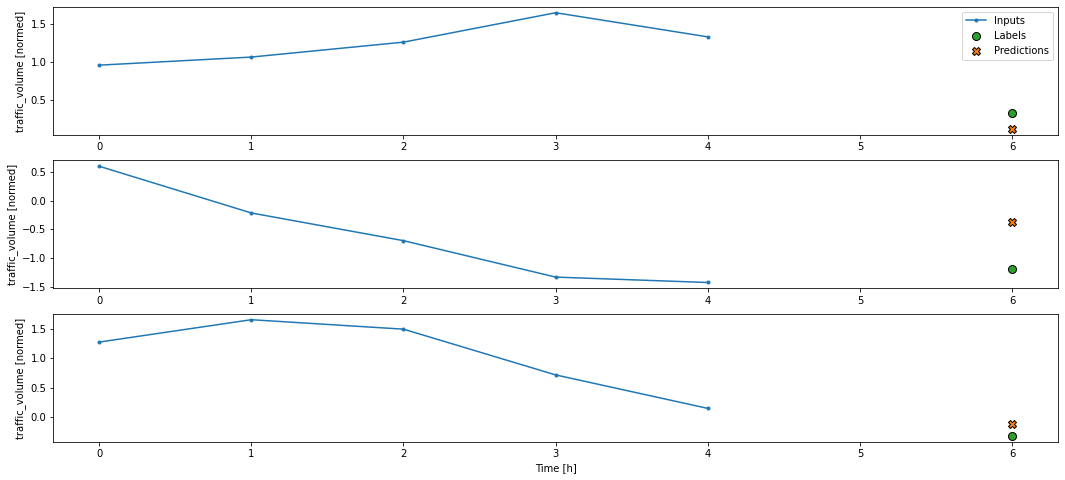

In [31]:
stacked_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

NUM_EPOCHS = 20
LR = 0.01

history = compile_and_fit(stacked_lstm_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['STACKED_LSTM'] = stacked_lstm_model.evaluate(window_5_1_2.val)
performance['STACKED_LSTM'] = stacked_lstm_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(stacked_lstm_model)

# Bidirectional LSTM Model 

157/157 [==============================] - 1s 4ms/step - loss: 0.0857 - mean_absolute_error: 0.2084


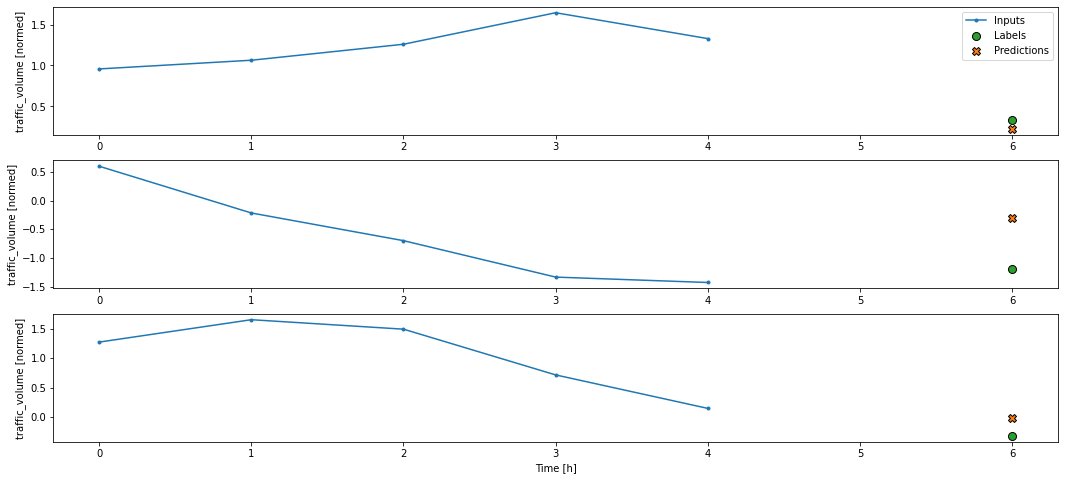

In [32]:
bilstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
    tf.keras.layers.Dense(1)
])


NUM_EPOCHS = 20
LR = 0.01

history = compile_and_fit(bilstm_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['BI-LSTM'] = bilstm_model.evaluate(window_5_1_2.val)
performance['BI-LSTM'] = bilstm_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(bilstm_model)

# 1-D CNN with LSTMS 

157/157 [==============================] - 1s 3ms/step - loss: 0.1047 - mean_absolute_error: 0.2209


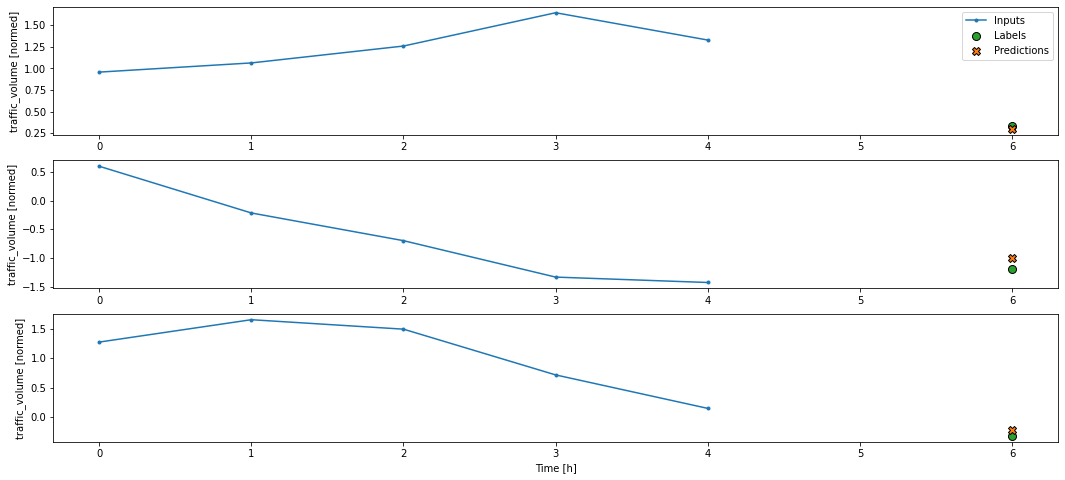

In [33]:
cnn_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(input_window_width,),
                           activation='relu'),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(1)
])


NUM_EPOCHS = 20
LR = 0.01

history = compile_and_fit(cnn_lstm_model,window_5_1_2, NUM_EPOCHS, LR )

val_performance['CNN_LSTM'] = cnn_lstm_model.evaluate(window_5_1_2.val)
performance['CNN_LSTM'] = cnn_lstm_model.evaluate(window_5_1_2.test, verbose=0)
window_5_1_2.plot(cnn_lstm_model)

# MODEL PERFORMANCE COMPARISON 

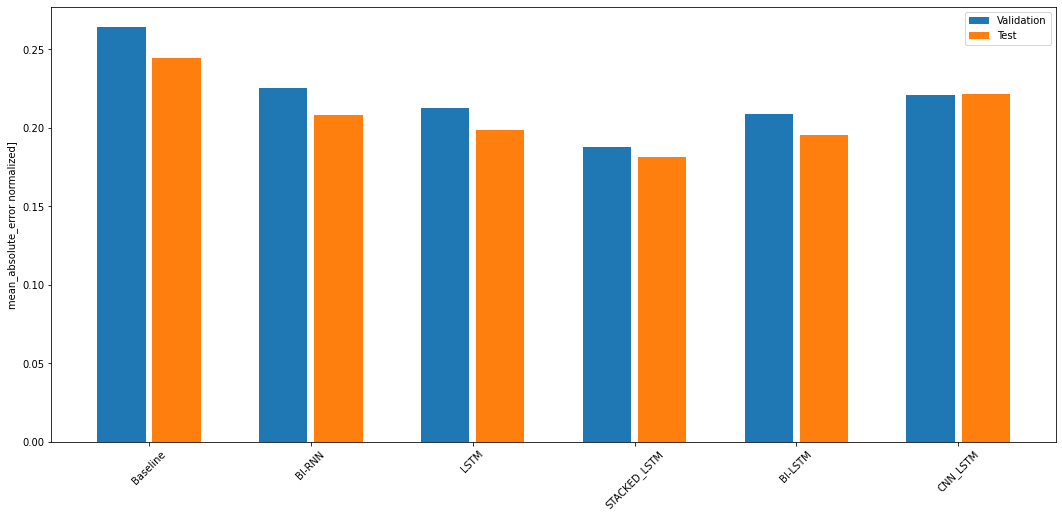

In [34]:
x = np.arange(len(performance))
fig, ax = plt.subplots(figsize = (18,8))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [35]:
for name, value in val_performance.items():
    print(f'{name:12s}: {value[1]:0.4f} MAE SCORE')

Baseline    : 0.2638 MAE SCORE
BI-RNN      : 0.2251 MAE SCORE
LSTM        : 0.2126 MAE SCORE
STACKED_LSTM: 0.1878 MAE SCORE
BI-LSTM     : 0.2084 MAE SCORE
CNN_LSTM    : 0.2209 MAE SCORE


## Fine Tuning the best model 

In [44]:
stacked_lstm_model_fine_tuned = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

NUM_EPOCHS = 200
LR = 0.001

history = compile_and_fit(stacked_lstm_model_fine_tuned,window_5_1_2, NUM_EPOCHS, LR )

## Making Prediction on Test Dataset

In [46]:
stacked_lstm_model_fine_tuned.evaluate(window_5_1_2.val)
stacked_lstm_model_fine_tuned.evaluate(window_5_1_2.test)

157/157 [==============================] - 1s 5ms/step - loss: 0.0625 - mean_absolute_error: 0.1670


[0.06252589076757431, 0.1670035868883133]

In [47]:
preds = stacked_lstm_model_fine_tuned.predict(window_5_1_2.test)
denormalized_preds = (np.squeeze(preds) * train_std["traffic_volume"]) + train_std["traffic_volume"]
denormalized_preds[:5]

array([1151.8936, 3759.2446, 4983.8955, 3300.4556, 3300.3872],
      dtype=float32)

## Submission File 

In [48]:
submission = pd.read_csv("../input/csc578-spring-2022-final/samp_sub.csv")
submission["prediction"] = denormalized_preds
submission.to_csv("submission.csv", index = False)
submission.head()

,id,prediction
0,1,1151.893555
1,2,3759.244629
2,3,4983.895508
3,4,3300.455566
4,5,3300.387207
